# Membuat Custom Training Loop dengan TensorFlow dan Fashion MNIST

### **Pendahuluan**
Pada video sebelumnya, Anda mempelajari cara membuat *custom training loop* untuk *simple linear regression*, dengan hubungan `y = mx + b`. Kali ini, kita akan melangkah lebih jauh dengan mengimplementasikan skenario *classification* menggunakan dataset yang lebih besar, yaitu Fashion MNIST.

#### **Peningkatan dari Sebelumnya**
1. Menggunakan dataset nyata (*Fashion MNIST*) melalui TensorFlow Datasets (*TFDS*).
2. Memanfaatkan *off-the-shelf* fungsi *loss* dan optimizer.
3. Menambahkan validasi performa menggunakan *test set*.
4. Melaporkan *metrics* saat pelatihan model.

### **Langkah-Langkah Membangun Model dan Training**
Kita tetap menggunakan lima langkah utama:
1. Mendefinisikan model.
2. Menyiapkan *training data pipeline*.
3. Memilih fungsi *loss* dan optimizer.
4. Melatih model dengan meminimalkan *loss*.
5. Menguji model.

---

### **Definisi Model**
#### **Struktur Model**
- Model adalah *Deep Neural Network* menggunakan API fungsional dari `tf.keras`.  
- **Input Layer**: 784 input, mewakili piksel dari gambar pakaian.  
  - Nama: `clothing`.  
- **Hidden Layers**: Dua *Dense Layers* dengan masing-masing 64 neuron.  
- **Output Layer**: 10 neuron, diaktifkan dengan *softmax* untuk klasifikasi 10 kategori pakaian.

#### **Parameter Trainable**
Setiap neuron memiliki *weights* dan *bias*. Model ini memiliki total parameter yang lebih banyak dibandingkan contoh sebelumnya.

---

### **Persiapan Data Pipeline**
#### **Langkah-Langkah Persiapan Data**
1. **Menggunakan TensorFlow Datasets**  
   - Mengambil data dengan `tfds.load`.  
     - Split: `train` untuk *training data*.  
     - Split: `test` untuk *test data*.  
2. **Normalisasi Data**  
   - Pixel dalam rentang `0-255` diubah menjadi `0-1`.  
   - Menggunakan `tf.cast` untuk konversi nilai integer menjadi *floating point*.  
3. **Mapping Data**  
   - Data diformat menggunakan fungsi `format_image` agar sesuai dengan input model.  

#### **Pengolahan Data yang Besar**
Untuk dataset besar:
- Gunakan *buffering* (misalnya, `1024`) agar efisien.
- Sampling dilakukan secara acak menggunakan fungsi `.shuffle` dan `.batch` dengan ukuran batch `64`.

---

### **Fungsi Loss dan Optimizer**
#### **Fungsi Loss**
- **Sparse Categorical Cross Entropy**: Cocok untuk prediksi kategori (*categorical predictions*) dengan label integer (bukan *one-hot encoded*).
  - **Keunggulan**: Lebih hemat memori dan komputasi.

#### **Optimizer**
- **Adam Optimizer**: Pilihan standar yang efisien untuk berbagai jenis model.

---

### **Rangkuman**
Dengan memahami langkah-langkah ini, Anda akan:
1. Membuat model klasifikasi menggunakan *custom training loop*.
2. Mengimplementasikan pipeline data yang efisien.
3. Memvalidasi performa model dengan metrik yang tepat.

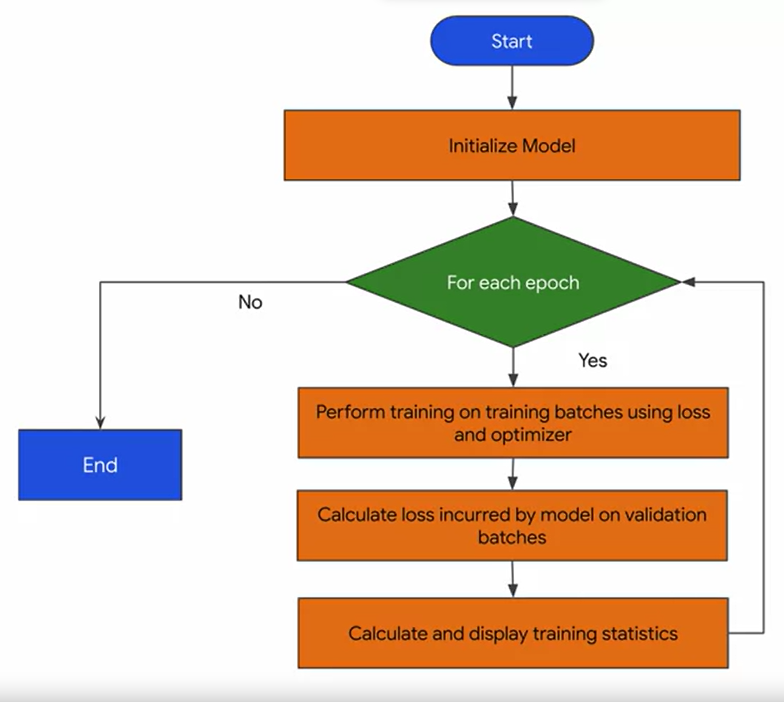

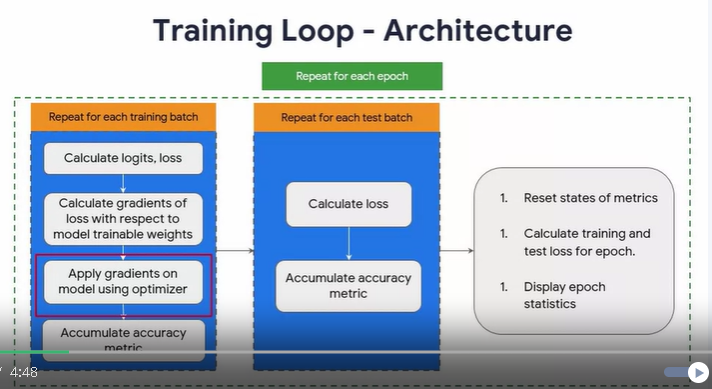

# **Panduan Training Loop Kustom**

### **1. Alur Pelatihan**
#### **Langkah-langkah utama dalam loop pelatihan kustom:**
- **Inisialisasi Model**: Definisikan model yang akan dilatih.
- **Proses Pelatihan untuk Setiap Epoch**:
  1. **Prediksi**: Hitung output model (logits) berdasarkan batch data input.
  2. **Perhitungan Loss**: Gunakan fungsi loss untuk menghitung nilai loss.
  3. **Gradien**: Hitung gradien dari loss terhadap variabel-variabel model yang dapat dilatih.
  4. **Optimasi**: Perbarui variabel model menggunakan optimizer.
  5. **Akurasi**: Hitung metrik akurasi untuk batch saat ini.
- **Proses Validasi (Opsional)**:
  - Lakukan validasi pada data test untuk melaporkan akurasi dan loss.
- **Ringkasan**: Hitung rata-rata loss untuk training dan validation set, lalu tampilkan statistik pelatihan per epoch.
- **Reset Metrik**: Reset metrik untuk epoch berikutnya.

---

### **2. Struktur Training Loop**
#### **a. Training Loop untuk `n` Epoch**
1. **Training untuk Data Pelatihan**:
   - Loop melalui batch dalam data pelatihan.
   - Hitung logits, loss, gradien, dan akurasi.
   - Simpan nilai loss untuk setiap batch.
2. **Validasi pada Data Test** (Opsional):
   - Loop melalui batch dalam data test.
   - Hitung loss dan akurasi untuk set ini.
3. **Hitung Rata-rata Loss**:
   - Rata-rata nilai loss batch untuk seluruh data pelatihan dan validasi.
4. **Tampilkan Statistik Epoch**:
   - Cetak nilai loss dan akurasi per epoch.

---

### **3. Detail Proses pada Batch**
#### **Proses Setiap Batch**:
1. Ambil batch data menggunakan iterator (`x_batch_train`, `y_batch_train`).
2. Hitung logits dan loss menggunakan fungsi yang didefinisikan.
3. Hitung gradien dan perbarui variabel model dengan optimizer.
4. Hitung akurasi prediksi untuk batch saat ini.
5. Tambahkan nilai loss ke array `losses`.

#### **Catatan**:
- Jika ukuran batch tidak membagi dataset secara merata, batch terakhir mungkin memiliki ukuran berbeda.
- Contoh:
  - Dataset: 60.000 item.
  - Ukuran batch: 25.000.
  - Hasil: Batch dengan ukuran 25.000, 25.000, dan 10.000.
  - Hal ini dapat menyebabkan rata-rata loss sedikit bias.

---

### **4. Validasi Model**
#### **Proses Validasi:**
- Hitung loss dan akurasi pada data test.
- Laporkan performa model terhadap data non-pelatihan.

---

### **5. Statistik Pelatihan**
#### **Output Per Epoch**:
- Rata-rata loss pada data pelatihan.
- Rata-rata loss pada data validasi (jika ada).
- Akurasi per epoch.

---

### **6. Performa pada Batch**
- **Fungsi `apply_gradient`**:
  - Ambil optimizer, model, dan batch data.
  - Hitung logits, loss, dan gradien.
  - Perbarui model berdasarkan gradien.
- **Penyimpanan Data**:
  - Loss per batch disimpan dalam array untuk dihitung rata-rata.

---

### **7. Tantangan dan Solusi**
#### **Bias pada Batch Terakhir**:
- Batch terakhir dengan ukuran berbeda dapat mempengaruhi rata-rata loss.
- Solusi: Pastikan ukuran batch konsisten, atau gunakan strategi untuk menormalkan loss.

---

### **Kesimpulan**
Loop pelatihan kustom memungkinkan fleksibilitas untuk menyesuaikan langkah pelatihan. Validasi model memberikan wawasan performa pada data non-pelatihan. Proses ini penting untuk mengoptimalkan performa model.